In [1]:
import pandas as pd
import numpy as np
from __future__ import division
from math import log10

from skimage.io import imread
import skimage
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
parr = imread('parrots.jpg')

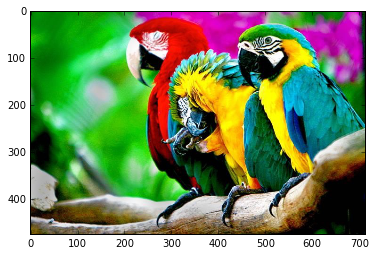

In [3]:
pylab.imshow(parr) #Colors coded as 8bit RGB, max 255

In [4]:
parr = skimage.img_as_float(parr) #Recode colors to 3-element float vectors, max 1

In [5]:
def Reconstruct_mean(orig, clnum):
    """Takes the original image, splits all pixels into 'clnum' color clusters,
    fills each cluster with the mean color of pixels in it, returns the transformed image"""
    X = np.reshape(orig, (-1,3))
    n1 = orig.shape[0]
    n2 = orig.shape[1]
    model = KMeans(n_clusters=clnum, init='k-means++', random_state=241).fit(X)
    
    def average_color(cluster, X):
        """Argument is the numeric name of cluster (out of maximum n_clusters of Kmeans model),
        returns the average color of all pixels from that cluster. 
        Color is coded as 3-element array with float values RGB"""
        Rsum = 0
        Gsum = 0
        Bsum = 0
        count = 0
        for i in range(337962):
            if model.labels_[i]==cluster:
                count += 1 
                Rsum += X[i,0]
                Gsum += X[i,1]
                Bsum += X[i,2]
        R = Rsum/count
        G = Gsum/count
        B = Bsum/count
        return R,G,B   
    
    colorsmean = np.zeros((clnum,3))
    for cl in range(clnum):
        colorsmean[cl] = average_color(cl, X)
    newX = np.zeros((n1*n2, 3))
    for i in range(n1*n2):
        for cl in range(clnum):
            if model.labels_[i]==cl:
                newX[i] = colorsmean[cl]
    newimage = np.reshape(newX, (n1, n2, 3))
    return newimage

In [6]:
def Reconstruct_median(orig, clnum):
    """Takes the original image, splits all pixels into 'clnum' color clusters,
    fills each cluster with the median color of pixels in it, returns the transformed image"""
    X = np.reshape(orig, (-1,3))
    n1 = orig.shape[0]
    n2 = orig.shape[1]
    model = KMeans(n_clusters=clnum, init='k-means++', random_state=241).fit(X)
    
    def median_color(cluster, X):
        """Argument is the numeric name of cluster (out of maximum n_clusters of Kmeans model),
        returns the median color of all pixels from that cluster. 
        Color is coded as 3-element array with float values RGB"""
        Rc = np.empty(0)
        Gc = np.empty(0)
        Bc = np.empty(0)
        for i in range(337962):
            if model.labels_[i]==cluster:
                Rc = np.append(Rc, X[i,0])
                Gc = np.append(Gc, X[i,1])
                Bc = np.append(Bc, X[i,2])
        return np.median(Rc),np.median(Gc),np.median(Bc)  

    colorsmedian = np.zeros((clnum,3))
    for cl in range(clnum):
        colorsmedian[cl] = median_color(cl, X)
    newX = np.zeros((n1*n2, 3))
    for i in range(n1*n2):
        for cl in range(clnum):
            if model.labels_[i]==cl:
                newX[i] = colorsmedian[cl]
    newimage = np.reshape(newX, (n1, n2, 3))
    return newimage

In [7]:
def PSNR(orig, new):
    """Takes the orignial image and the reconstructed image as arrays of pixel colors,
    Returns the PSNR metric of compression quality."""
    n1 = orig.shape[0]
    n2 = orig.shape[1]
    X = np.reshape(orig, (-1,3))
    newX = np.reshape(new, (-1,3))
    MSE = 0
    for i in range(337962):
        for j in range(3):
            MSE += (1/(n1*n2*3)) * (X[i,j] - newX[i,j])**2
    answer = 10 * log10(1/MSE)
    return answer

# PSNR is Peak Signal-to-Noise Ratio, metric that measures quality of reconstruction
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

In [8]:
newimages = []
for i in range(1,21):
    newparr = Reconstruct_mean(parr, i)
    newimages.append(newparr)

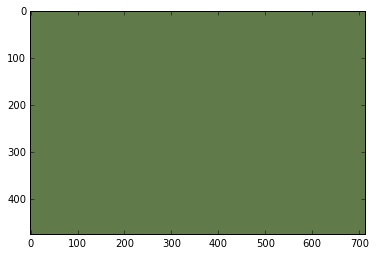

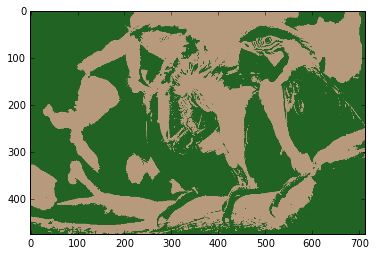

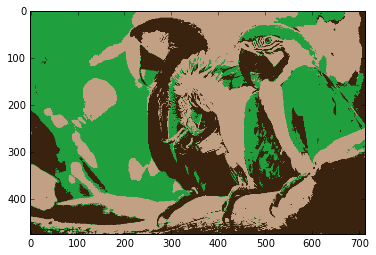

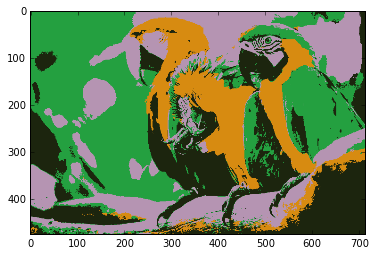

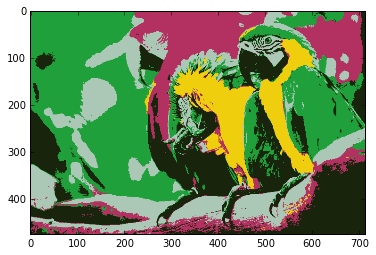

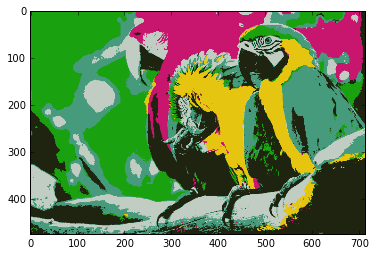

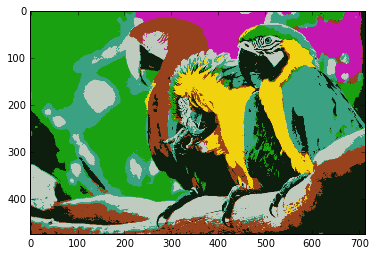

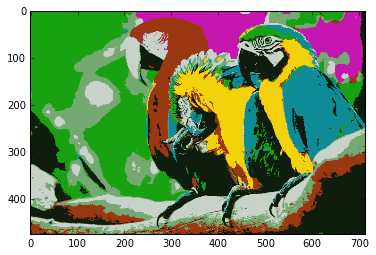

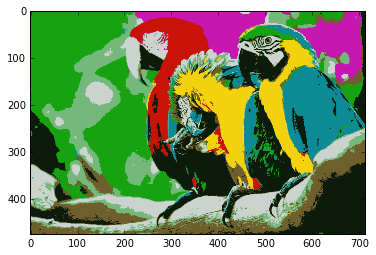

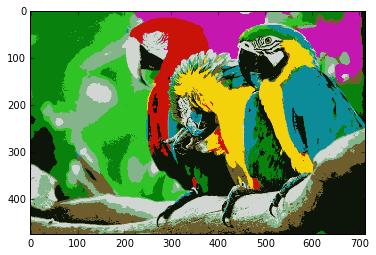

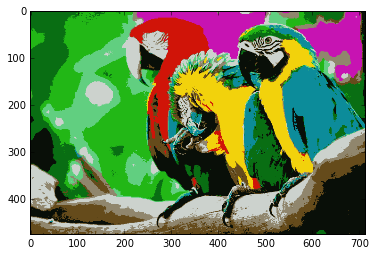

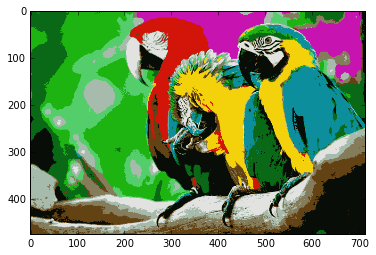

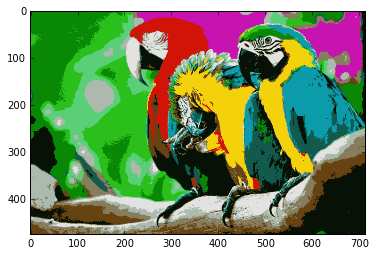

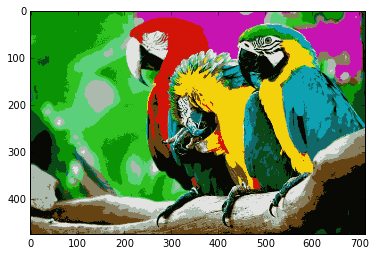

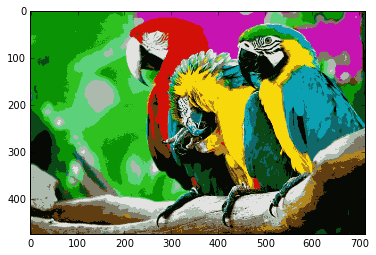

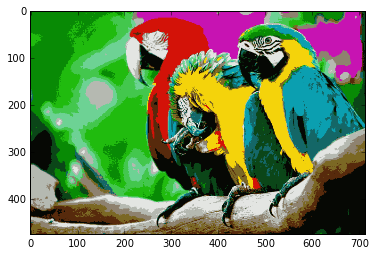

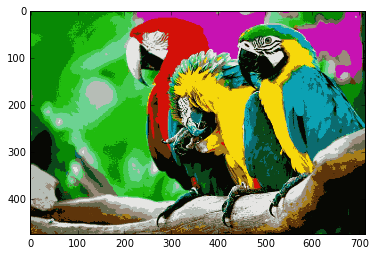

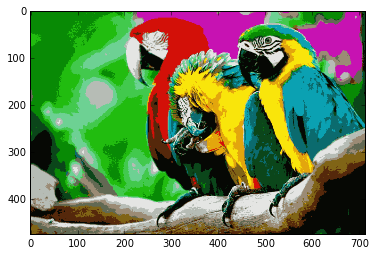

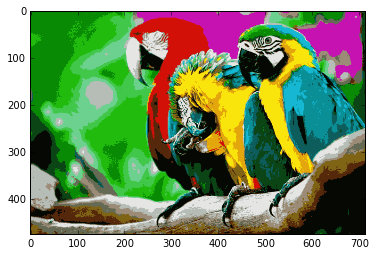

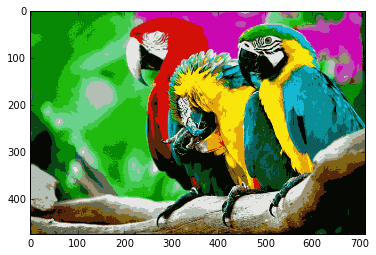

In [9]:
for im in newimages:
    plt.figure()
    pylab.imshow(im)

In [11]:
for ind,im in enumerate(newimages):
    print("Number of clusters: "+str(ind+1)+", PSNR="+str(PSNR(parr, im)))

Number of clusters: 1, PSNR=9.8657051347
Number of clusters: 2, PSNR=12.1426096415
Number of clusters: 3, PSNR=13.2043432239
Number of clusters: 4, PSNR=14.4133778148
Number of clusters: 5, PSNR=15.5839589012
Number of clusters: 6, PSNR=16.6011938254
Number of clusters: 7, PSNR=17.6954649864
Number of clusters: 8, PSNR=18.4828393395
Number of clusters: 9, PSNR=19.1631431641
Number of clusters: 10, PSNR=19.6919170898
Number of clusters: 11, PSNR=20.1788102333
Number of clusters: 12, PSNR=20.6471920248
Number of clusters: 13, PSNR=21.0739255311
Number of clusters: 14, PSNR=21.380189088
Number of clusters: 15, PSNR=21.6554707997
Number of clusters: 16, PSNR=21.9136652809
Number of clusters: 17, PSNR=22.173126154
Number of clusters: 18, PSNR=22.3846747115
Number of clusters: 19, PSNR=22.572563264
Number of clusters: 20, PSNR=22.7666959557


In [12]:
newimages2 = []
for i in range(1,21):
    newparr = Reconstruct_median(parr, i)
    newimages2.append(newparr)

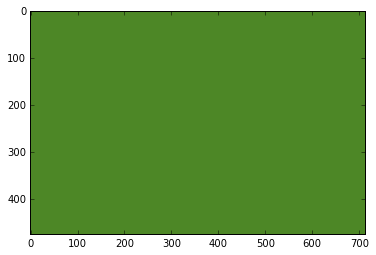

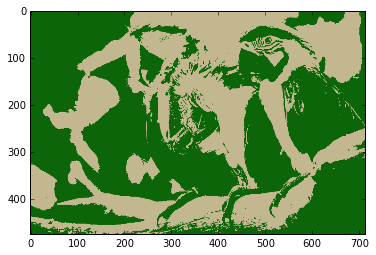

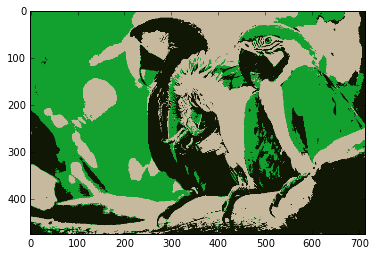

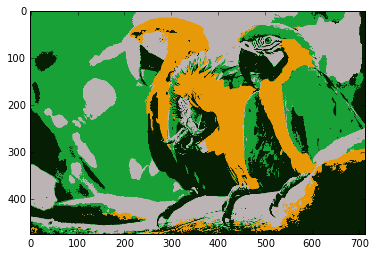

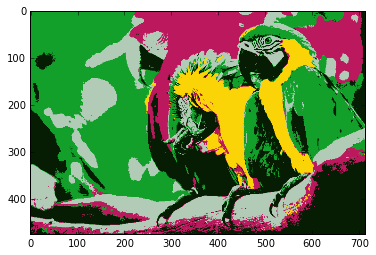

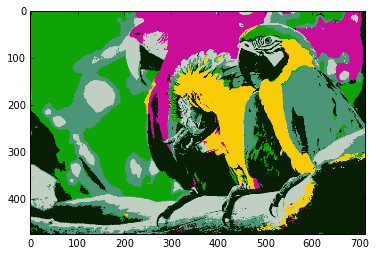

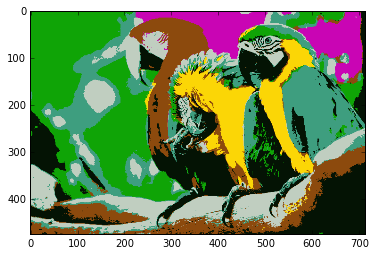

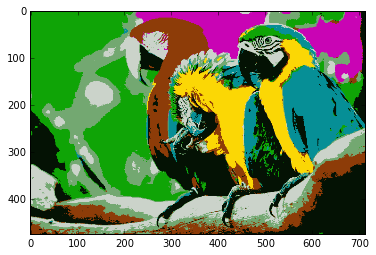

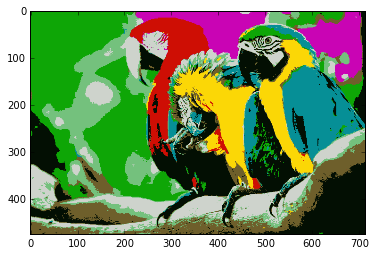

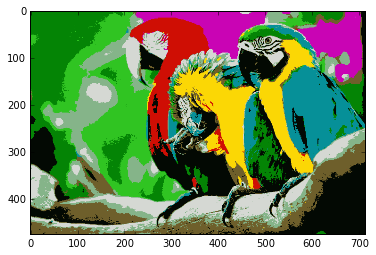

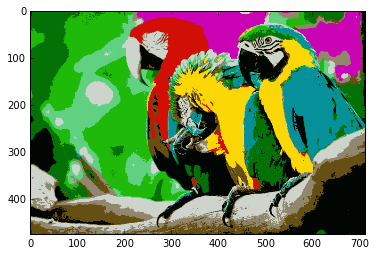

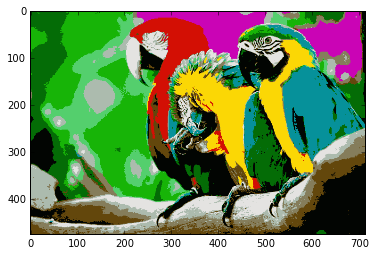

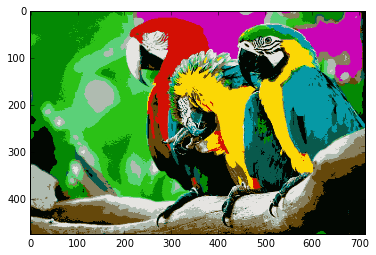

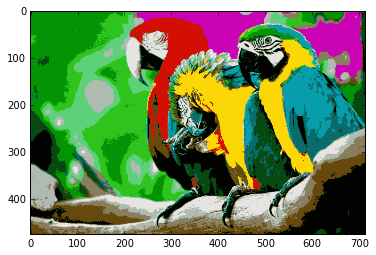

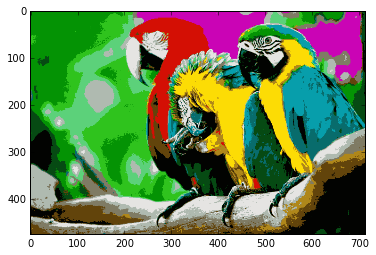

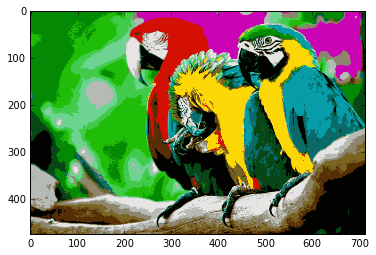

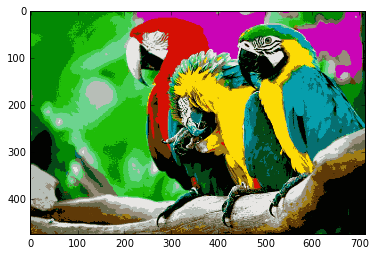

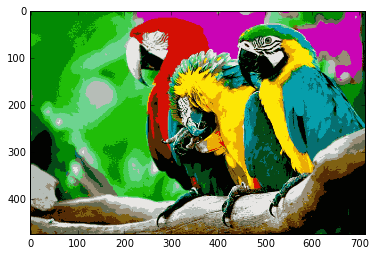

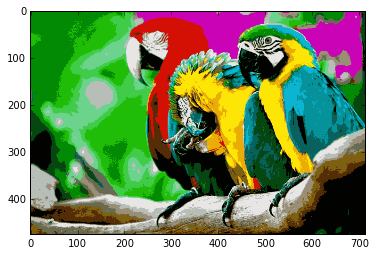

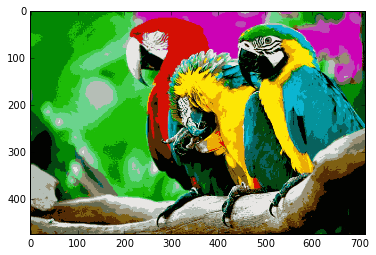

In [18]:
for im in newimages2:
    plt.figure()
    pylab.imshow(im)

In [19]:
for ind,im in enumerate(newimages2):
    print("Number of clusters: "+str(ind+1)+", PSNR="+str(PSNR(parr, im)))

Number of clusters: 1, PSNR=9.49709018037
Number of clusters: 2, PSNR=11.7330816419
Number of clusters: 3, PSNR=12.6824335467
Number of clusters: 4, PSNR=14.0620257159
Number of clusters: 5, PSNR=15.2467689752
Number of clusters: 6, PSNR=16.1180727133
Number of clusters: 7, PSNR=17.4093891373
Number of clusters: 8, PSNR=18.1862336757
Number of clusters: 9, PSNR=18.8659032322
Number of clusters: 10, PSNR=19.4671622227
Number of clusters: 11, PSNR=19.9060793962
Number of clusters: 12, PSNR=20.3507370862
Number of clusters: 13, PSNR=20.8516163319
Number of clusters: 14, PSNR=21.1806500582
Number of clusters: 15, PSNR=21.4670483441
Number of clusters: 16, PSNR=21.7085467578
Number of clusters: 17, PSNR=21.9797993679
Number of clusters: 18, PSNR=22.1878806385
Number of clusters: 19, PSNR=22.3788500627
Number of clusters: 20, PSNR=22.6164135205
